In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import Reshape4torch, GenerateLabel
from SSM_DL_evl import SSM_Model

# 1. Load Testing data

In [2]:
def MockupdataLoad(data_dir, phase = 'test', data = 'AE'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i and data in i:
            G_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i and data in i:
            B_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)
    
    def concat(data):
        return np.concatenate(data)

    G_X, B_X = add_ch(G_X), add_ch(B_X)
    G_X, B_X = Reshape4torch(G_X), Reshape4torch(B_X)
                             
    GB_Xs, GB_Ys = [G_X, B_X], []
    for i, GB_X in zip(range(len(GB_Xs)), GB_Xs):
        GB_Ys.append(GenerateLabel(GB_X, i))
    return concat(GB_Xs), concat(GB_Ys)

In [3]:
data_root = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/2_NOISE_GN/'

sorted(os.listdir(data_root))

['-2db', '10db', '2db', '6db']

# 2. Evaluation

In [4]:
model_dir = './model/1_Die_Fixture/'
CM_save_dir = './results/1_confusion_mat/1-3_Trained model for NOISE_GN(13-16)/'

## 2.1. - 2 dB

Model: AE_GB_2003240040_04470_loss_0.000075_val_loss_0.000117.pt 

Accuracy: 89.66 % (2306 / 2572)


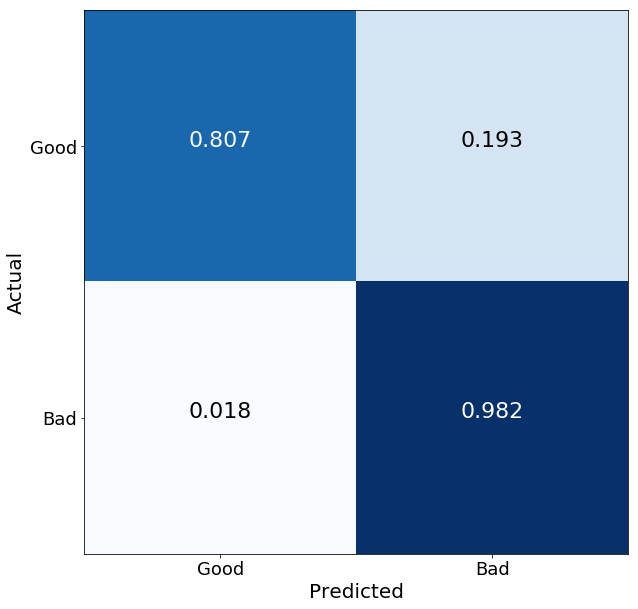

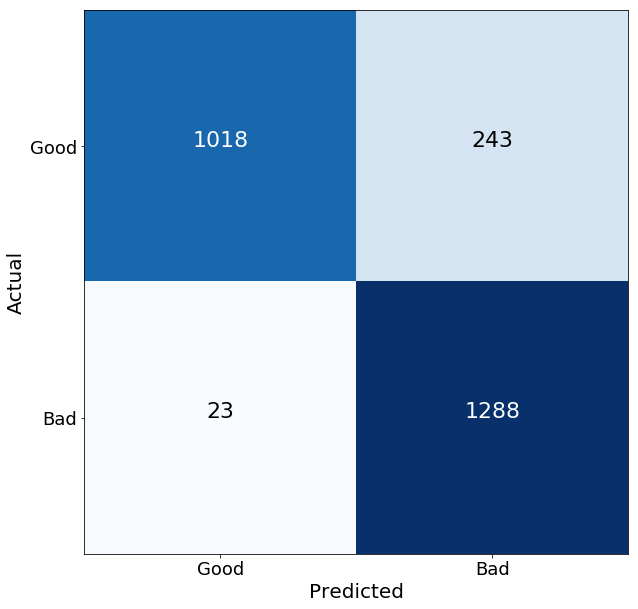

Model: Accel_GB_2003260027_04640_loss_0.000112_val_loss_0.000393.pt 

Accuracy: 50.35 % (1295 / 2572)


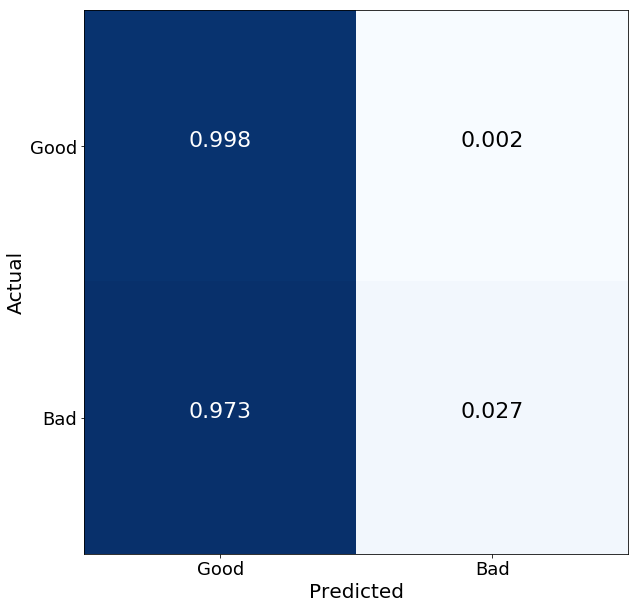

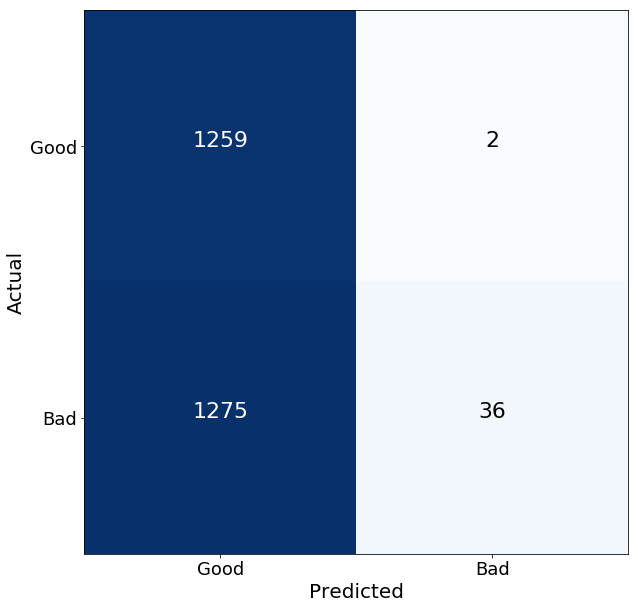

Model: A2_GB_2003260053_03810_loss_0.000211_val_loss_0.000215.pt 

Accuracy: 80.56 % (2072 / 2572)


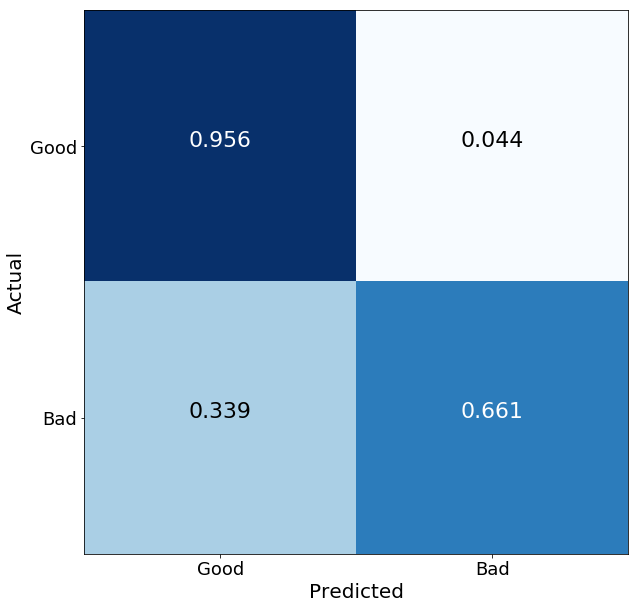

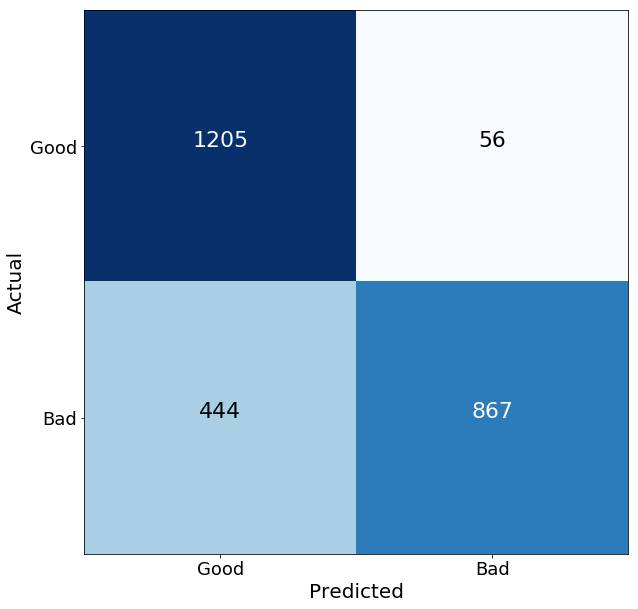

In [5]:
noise_db = '-2db'

AE_GB_test_X, AE_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'AE')
Accel_GB_test_X, Accel_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'accel')

A2_GB_test_X = np.concatenate((AE_GB_test_X, Accel_GB_test_X), axis = 1)
A2_GB_test_Y = AE_GB_test_Y.copy()

class_name = ['Good', 'Bad']

AE_GB_model = SSM_Model(AE_GB_test_X, AE_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'AE', GPU_idx = 3)

AE_GB_model.Evaluation(CM_save_dir, save_name = 'AE_Noise_-2dB', x_angle = 0)

Accel_GB_model = SSM_Model(Accel_GB_test_X, Accel_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                           model_dir = model_dir, model_name = 'Accel', GPU_idx = 3)

Accel_GB_model.Evaluation(CM_save_dir, save_name = 'Accel_Noise_-2dB', x_angle = 0)

A2_GB_model = SSM_Model(A2_GB_test_X, A2_GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'A2', GPU_idx = 3)

A2_GB_model.Evaluation(CM_save_dir, save_name = 'A2_Noise_-2dB', x_angle = 0)

## 2.2. 2 dB

Model: AE_GB_2003240040_04470_loss_0.000075_val_loss_0.000117.pt 

Accuracy: 94.48 % (2430 / 2572)


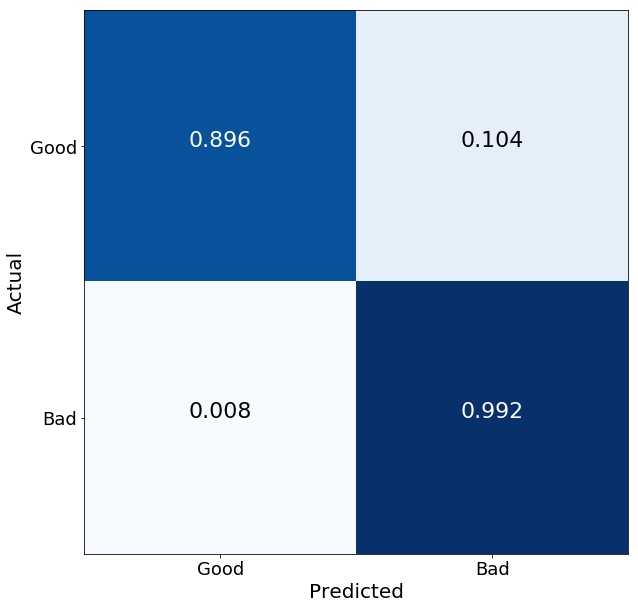

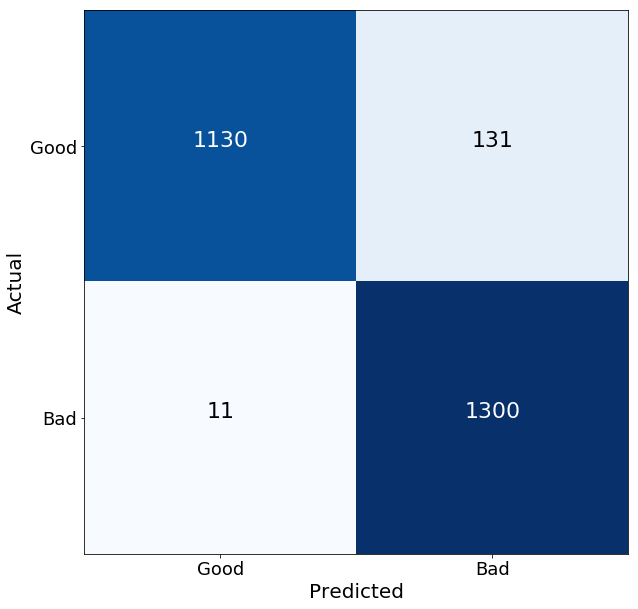

Model: Accel_GB_2003260027_04640_loss_0.000112_val_loss_0.000393.pt 

Accuracy: 55.79 % (1435 / 2572)


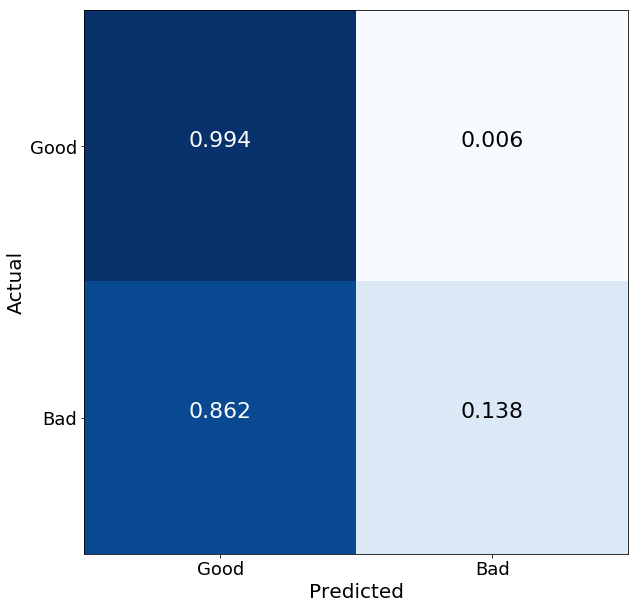

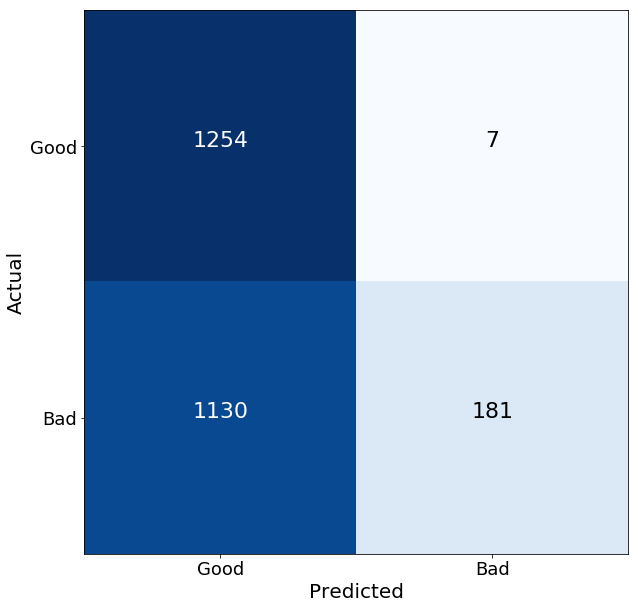

Model: A2_GB_2003260053_03810_loss_0.000211_val_loss_0.000215.pt 

Accuracy: 93.27 % (2399 / 2572)


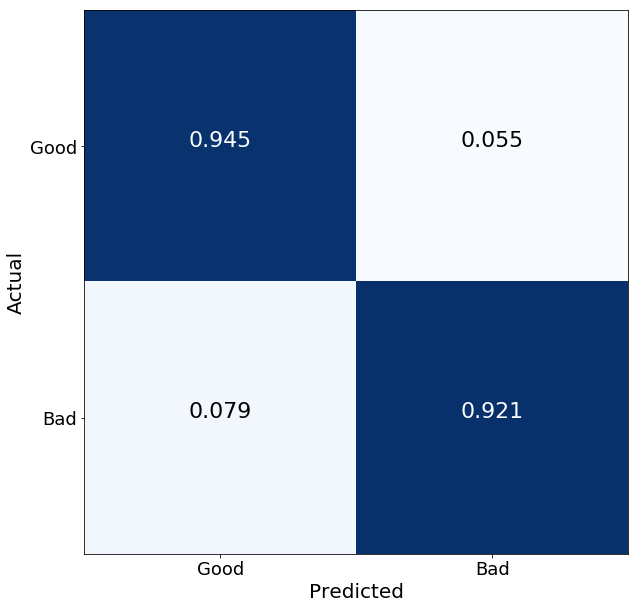

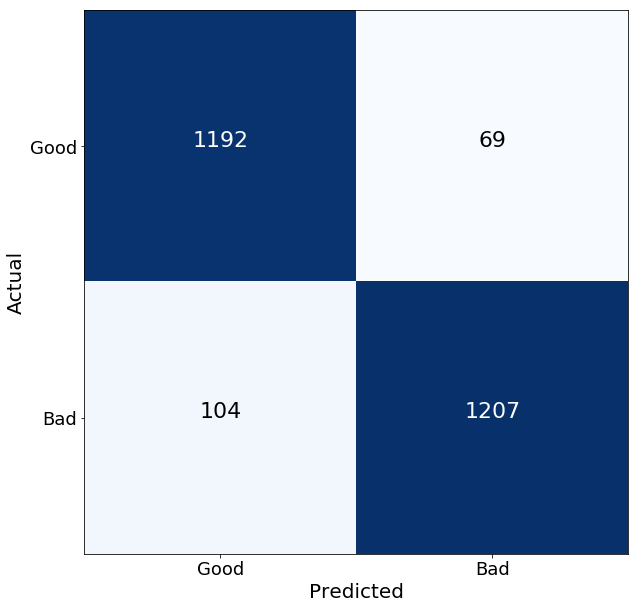

In [6]:
noise_db = '2db'

AE_GB_test_X, AE_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'AE')
Accel_GB_test_X, Accel_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'accel')

A2_GB_test_X = np.concatenate((AE_GB_test_X, Accel_GB_test_X), axis = 1)
A2_GB_test_Y = AE_GB_test_Y.copy()

class_name = ['Good', 'Bad']

AE_GB_model = SSM_Model(AE_GB_test_X, AE_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'AE', GPU_idx = 3)

AE_GB_model.Evaluation(CM_save_dir, save_name = 'AE_Noise_2dB', x_angle = 0)

Accel_GB_model = SSM_Model(Accel_GB_test_X, Accel_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                           model_dir = model_dir, model_name = 'Accel', GPU_idx = 3)

Accel_GB_model.Evaluation(CM_save_dir, save_name = 'Accel_Noise_2dB', x_angle = 0)

A2_GB_model = SSM_Model(A2_GB_test_X, A2_GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'A2', GPU_idx = 3)

A2_GB_model.Evaluation(CM_save_dir, save_name = 'A2_Noise_2dB', x_angle = 0)

## 2.3. 6 dB

Model: AE_GB_2003240040_04470_loss_0.000075_val_loss_0.000117.pt 

Accuracy: 96.62 % (2485 / 2572)


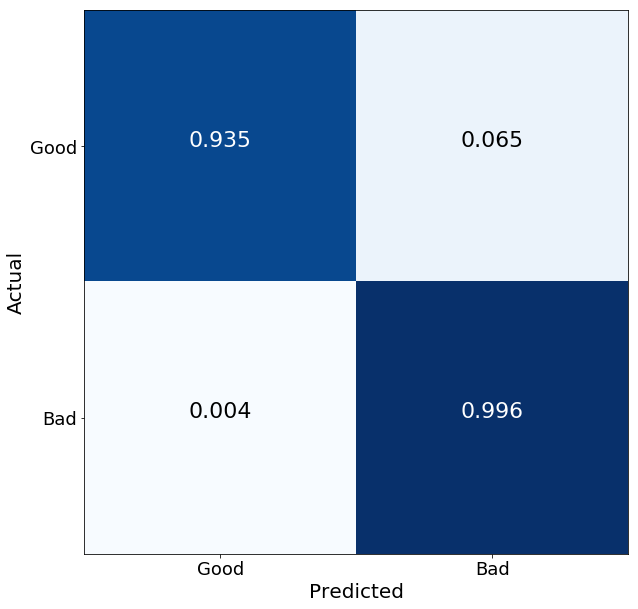

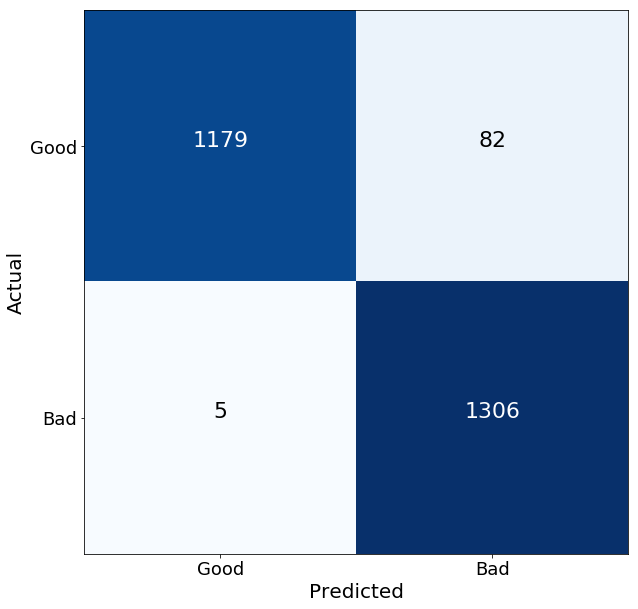

Model: Accel_GB_2003260027_04640_loss_0.000112_val_loss_0.000393.pt 

Accuracy: 74.69 % (1921 / 2572)


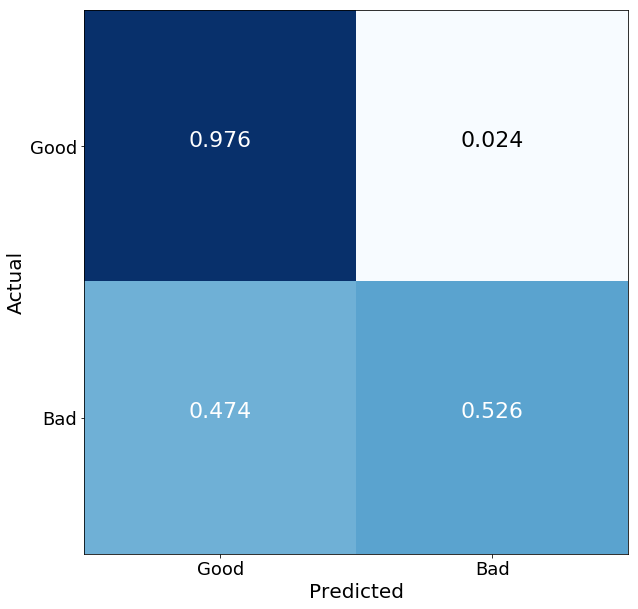

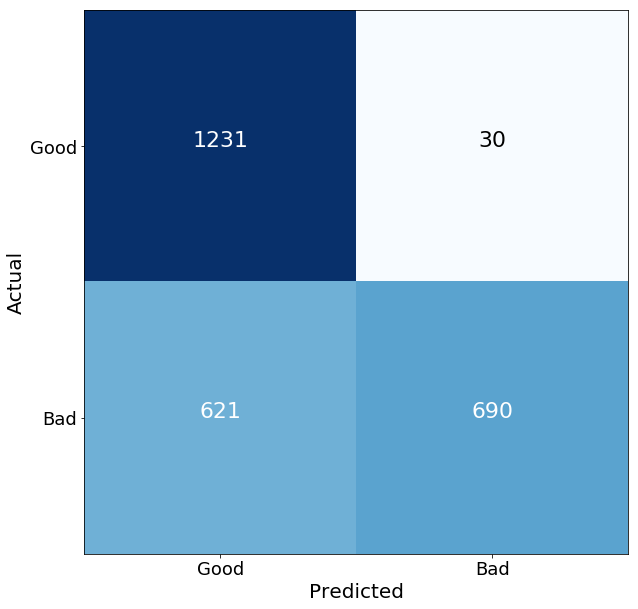

Model: A2_GB_2003260053_03810_loss_0.000211_val_loss_0.000215.pt 

Accuracy: 96.35 % (2478 / 2572)


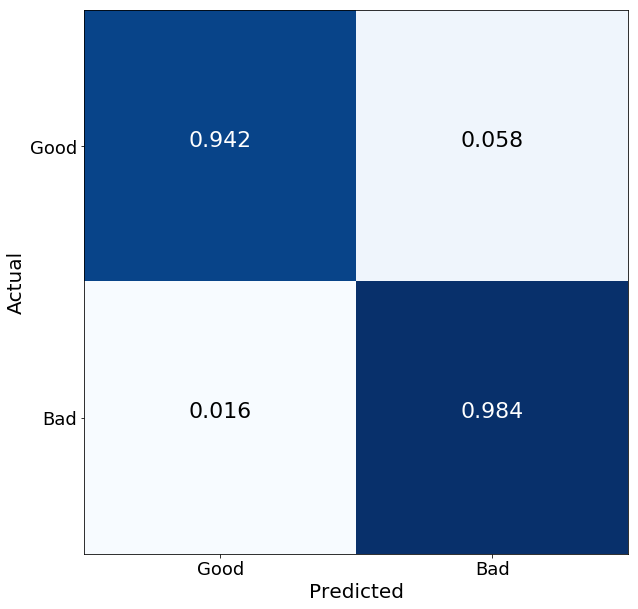

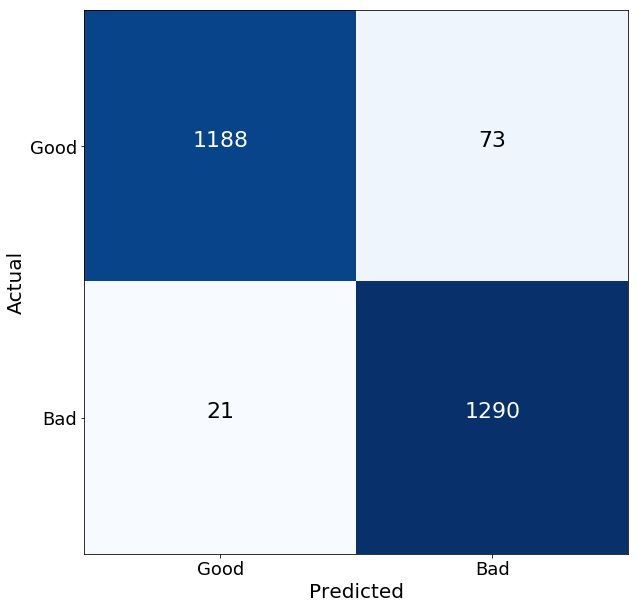

In [7]:
noise_db = '6db'

AE_GB_test_X, AE_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'AE')
Accel_GB_test_X, Accel_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'accel')

A2_GB_test_X = np.concatenate((AE_GB_test_X, Accel_GB_test_X), axis = 1)
A2_GB_test_Y = AE_GB_test_Y.copy()

class_name = ['Good', 'Bad']

AE_GB_model = SSM_Model(AE_GB_test_X, AE_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'AE', GPU_idx = 3)

AE_GB_model.Evaluation(CM_save_dir, save_name = 'AE_Noise_6dB', x_angle = 0)

Accel_GB_model = SSM_Model(Accel_GB_test_X, Accel_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                           model_dir = model_dir, model_name = 'Accel', GPU_idx = 3)

Accel_GB_model.Evaluation(CM_save_dir, save_name = 'Accel_Noise_6dB', x_angle = 0)

A2_GB_model = SSM_Model(A2_GB_test_X, A2_GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'A2', GPU_idx = 3)

A2_GB_model.Evaluation(CM_save_dir, save_name = 'A2_Noise_6dB', x_angle = 0)

## 2.4. 10 dB

Model: AE_GB_2003240040_04470_loss_0.000075_val_loss_0.000117.pt 

Accuracy: 97.20 % (2500 / 2572)


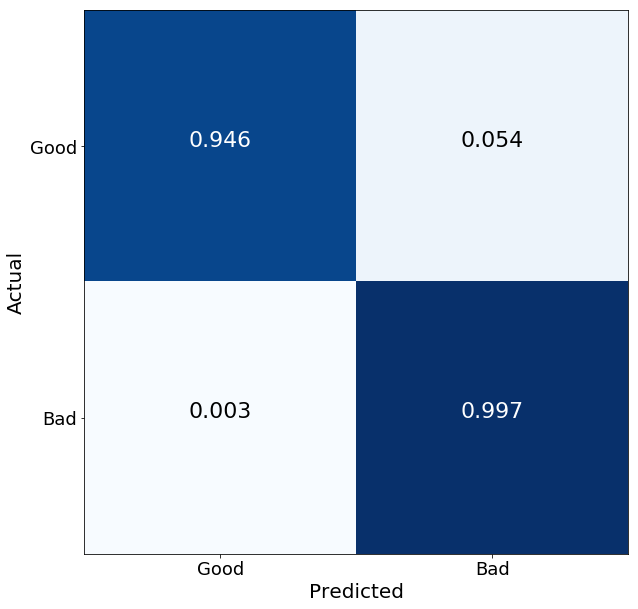

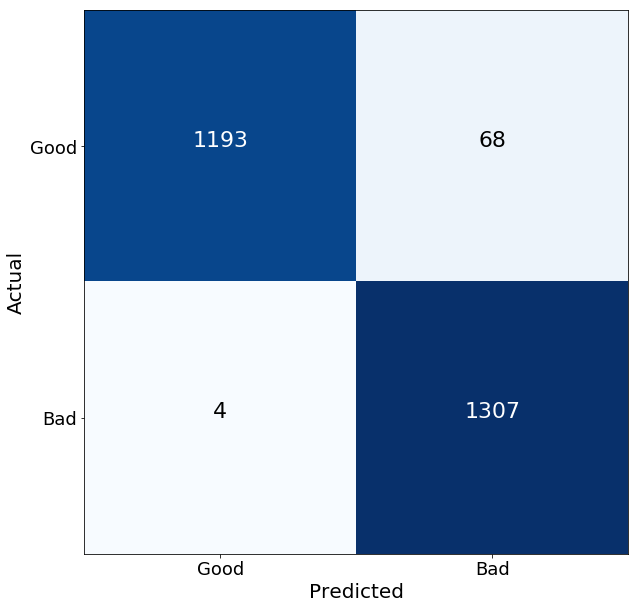

Model: Accel_GB_2003260027_04640_loss_0.000112_val_loss_0.000393.pt 

Accuracy: 91.06 % (2342 / 2572)


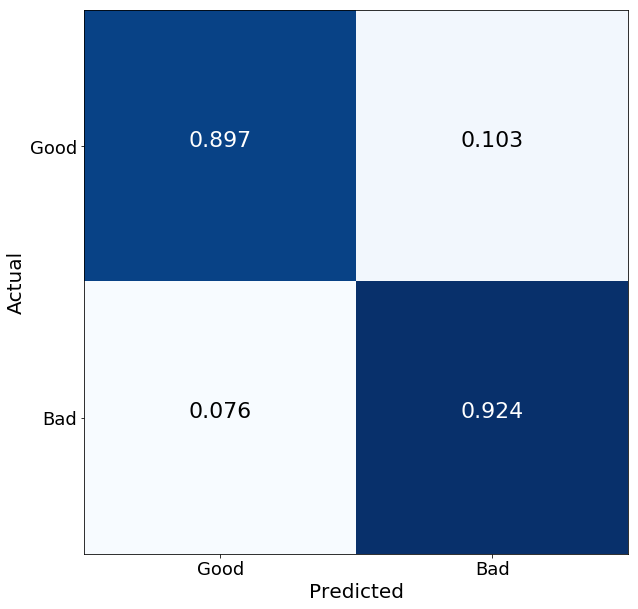

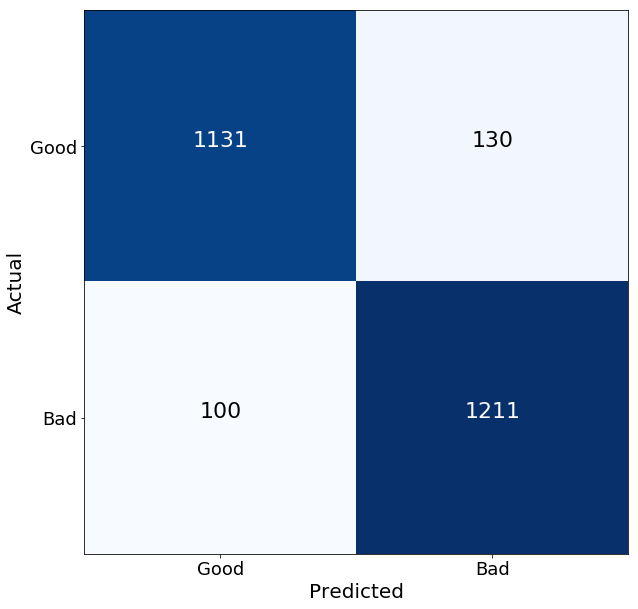

Model: A2_GB_2003260053_03810_loss_0.000211_val_loss_0.000215.pt 

Accuracy: 96.93 % (2493 / 2572)


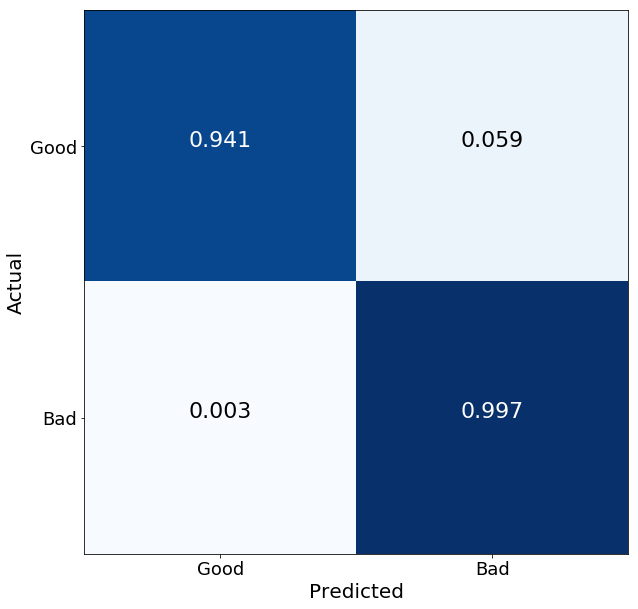

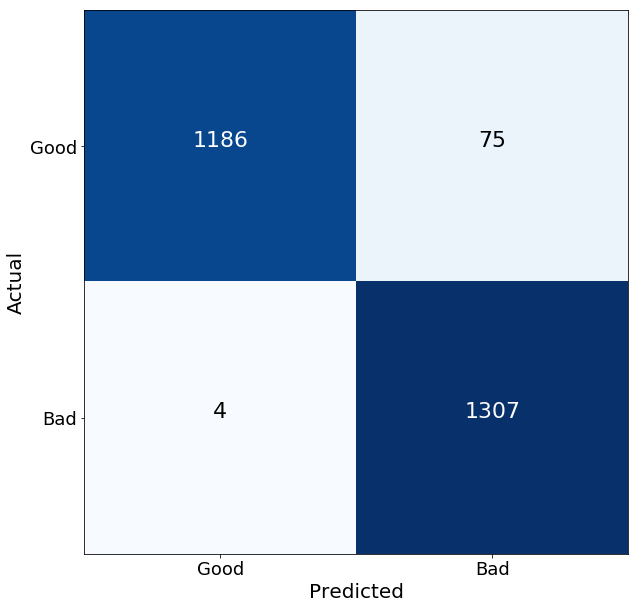

In [8]:
noise_db = '10db'

AE_GB_test_X, AE_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'AE')
Accel_GB_test_X, Accel_GB_test_Y = MockupdataLoad(data_root + noise_db, phase = 'test', data = 'accel')

A2_GB_test_X = np.concatenate((AE_GB_test_X, Accel_GB_test_X), axis = 1)
A2_GB_test_Y = AE_GB_test_Y.copy()

class_name = ['Good', 'Bad']

AE_GB_model = SSM_Model(AE_GB_test_X, AE_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'AE', GPU_idx = 3)

AE_GB_model.Evaluation(CM_save_dir, save_name = 'AE_Noise_10dB', x_angle = 0)

Accel_GB_model = SSM_Model(Accel_GB_test_X, Accel_GB_test_Y, n_ch = 1, n_cls = 2, class_name = class_name, 
                           model_dir = model_dir, model_name = 'Accel', GPU_idx = 3)

Accel_GB_model.Evaluation(CM_save_dir, save_name = 'Accel_Noise_10dB', x_angle = 0)

A2_GB_model = SSM_Model(A2_GB_test_X, A2_GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                        model_dir = model_dir, model_name = 'A2', GPU_idx = 3)

A2_GB_model.Evaluation(CM_save_dir, save_name = 'A2_Noise_10dB', x_angle = 0)